### -------------------------------------------------------------------------
### Aula Inteligência Artificial
### Algoritmos:  Árvore de Decisão, KNN e Randon Forest
### -------------------------------------------------------------------------


### Métricas de avaliação:
##### - Avaliar os classificadores Árvore de Decisão, KNN e Randon Forest

##### - Avaliar os dados sem normalização e com normalização StandardScaler() e MinMaxScaler()

##### - Avaliar os dados sem validação cruzada e com validação cruzada no conjunto treino e teste

#### Base de dados: Diabetes prediction

In [65]:
import pandas
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import statistics as sts
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# carrega a base de dados
from google.colab import files 
dados = pandas.read_csv("diabetes_prediction_dataset.csv")
dados

#### **- Análise dos dados**

In [67]:
dados.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [68]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [69]:
dados

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [70]:
dados['gender'].value_counts

<bound method IndexOpsMixin.value_counts of 0        Female
1        Female
2          Male
3        Female
4          Male
          ...  
99995    Female
99996    Female
99997      Male
99998    Female
99999    Female
Name: gender, Length: 100000, dtype: object>

In [71]:
dados['smoking_history'].value_counts

<bound method IndexOpsMixin.value_counts of 0          never
1        No Info
2          never
3        current
4        current
          ...   
99995    No Info
99996    No Info
99997     former
99998      never
99999    current
Name: smoking_history, Length: 100000, dtype: object>

In [72]:
le = LabelEncoder()
dados['gender'] = le.fit_transform(dados['gender'])
dados['smoking_history'] = le.fit_transform(dados['smoking_history'])
dados

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


### **- Árvore de decisão sem validação cruzada e Normalização (0)**
######     - Acurácia: 0.9546333333333333

In [73]:
### Faz a separação entre treino e teste (70% e 30%)
X = dados.drop(['diabetes'], axis=1).values
y = dados['diabetes'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [74]:
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

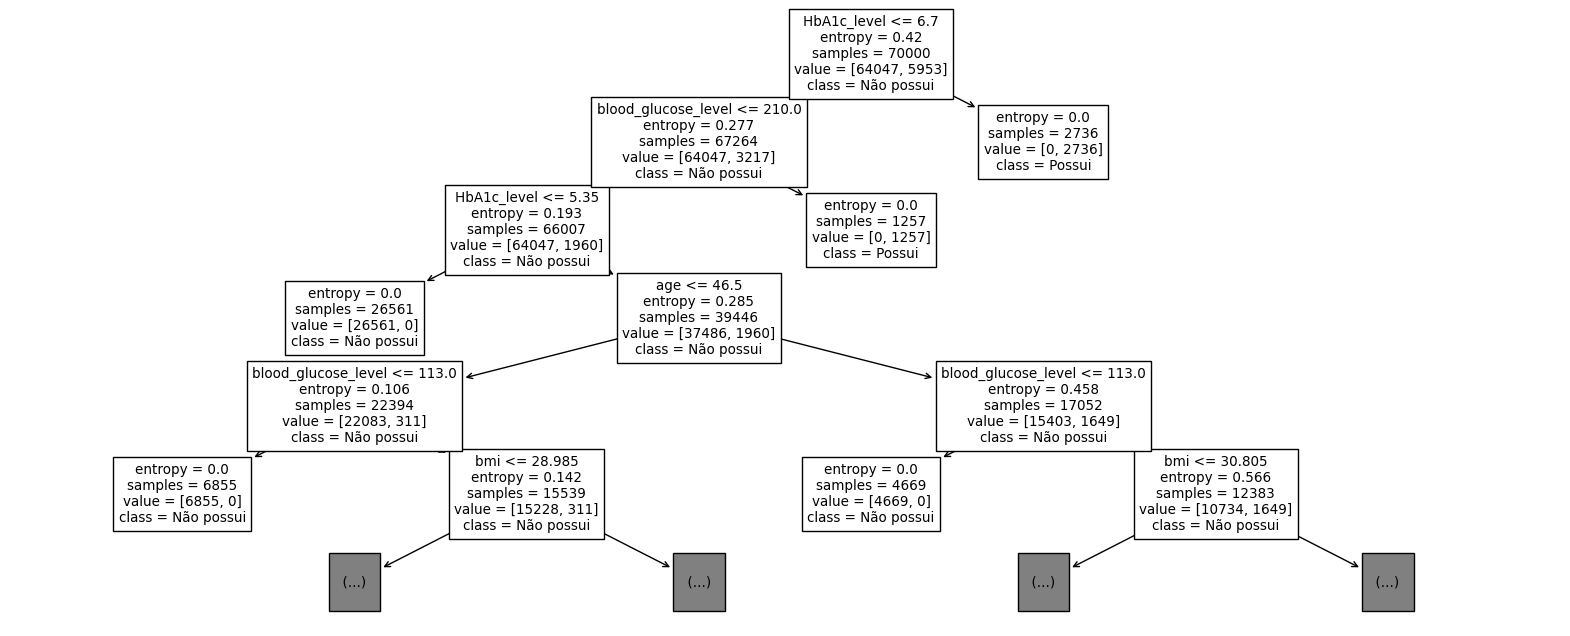

In [75]:
#Plot da árvore de decisão

fig = plt.figure(figsize=(20,8))

tree.plot_tree(clf, feature_names = dados.columns.drop('diabetes'),  
                    class_names = ['Não possui', 'Possui'],
                    max_depth = 5,
                    filled = False)

# tree.plot_tree(clf)

plt.show()                   


#### - Acurácia

In [76]:
accuracy_score(y_test,y_pred)

0.9543333333333334

#### - Matriz Confusão

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

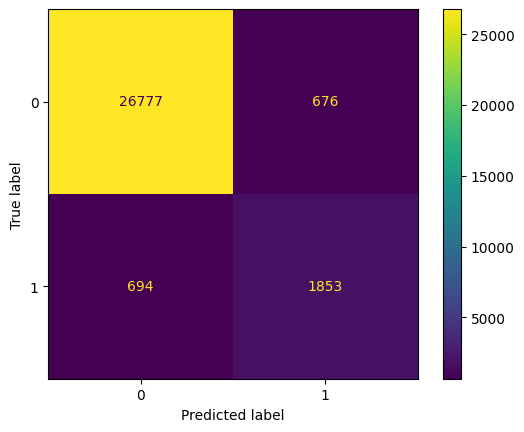

In [78]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

### **- Árvore de decisão normalizada com tipo Standard (1)**
######     - Acurácia: 0.9543

In [79]:
### Faz a separação entre treino e teste (70% e 30%)
X1 = dados.drop(['diabetes'], axis=1).values
y1 = dados['diabetes'].values

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, train_size=0.7, test_size=0.3, random_state=42)

In [80]:
scalerS = StandardScaler()
scalerS.fit(X_train1)

X_train1 = scalerS.transform(X_train1)
X_test1 = scalerS.transform(X_test1)

In [81]:
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train1, y_train1)
y_pred1 = clf.predict(X_test1)

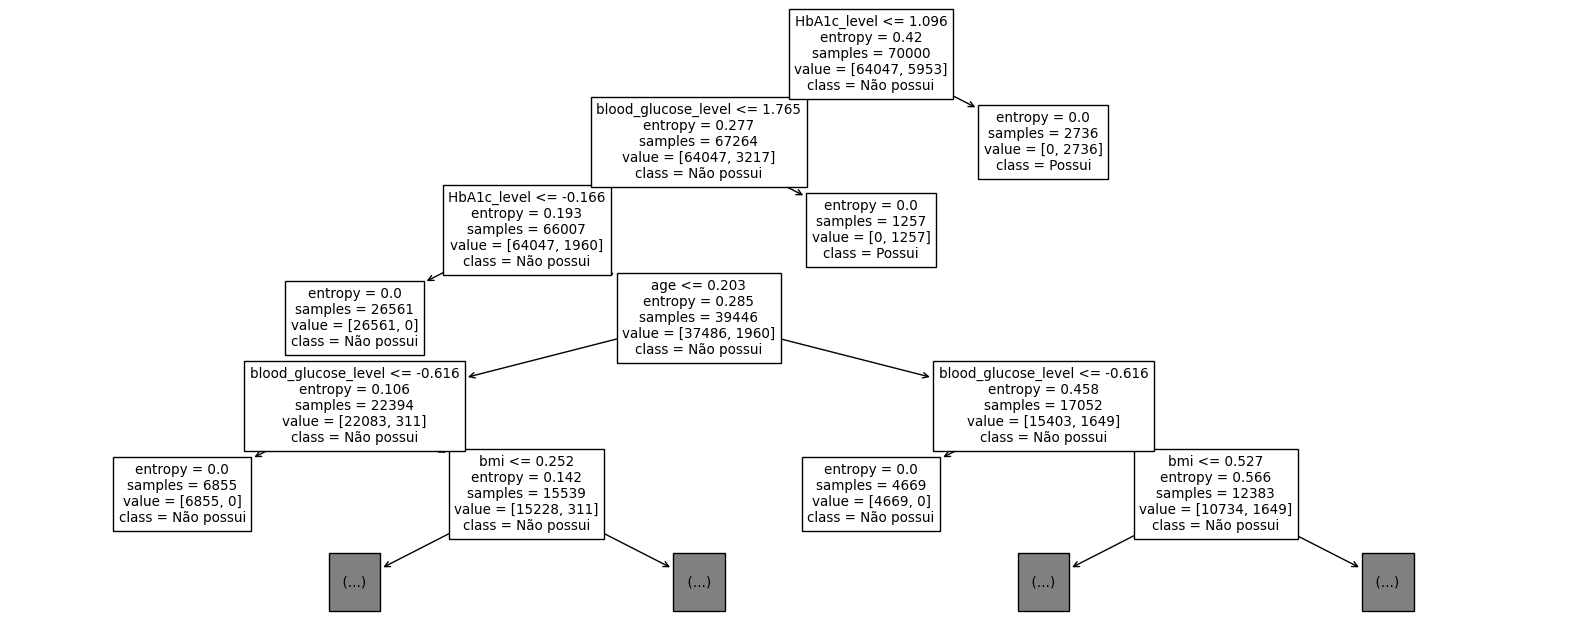

In [82]:
#Plot da árvore de decisão

fig = plt.figure(figsize=(20,8))

tree.plot_tree(clf, feature_names = dados.columns.drop('diabetes'),  
                    class_names = ['Não possui', 'Possui'],
                    max_depth = 5,
                    filled = False)

# tree.plot_tree(clf)

plt.show()

#### - Acurácia (1)

In [83]:
accuracy_score(y_test1,y_pred1)

0.9536

#### Matriz de Confusão (1)

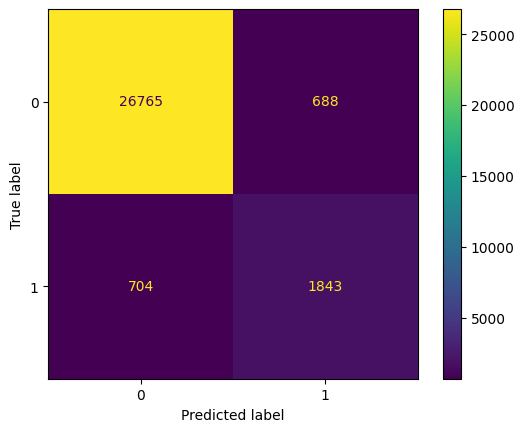

In [84]:
cm = confusion_matrix(y_test1, y_pred1)
ConfusionMatrixDisplay(cm).plot()

### - **Árvore de decisão normalizada com tipo MinMax (2)**
######     - Acurácia: 0.9546666666666667

In [85]:
### Faz a separação entre treino e teste (70% e 30%)
X2 = dados.drop(['diabetes'], axis=1).values
y2 = dados['diabetes'].values

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, train_size=0.7, test_size=0.3, random_state=42)

In [86]:
scalerM = MinMaxScaler()
scalerM.fit(X_train2)

X_train2 = scalerM.transform(X_train2)
X_test2 = scalerM.transform(X_test2)

In [87]:
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train2, y_train2)
y_pred2 = clf.predict(X_test2)

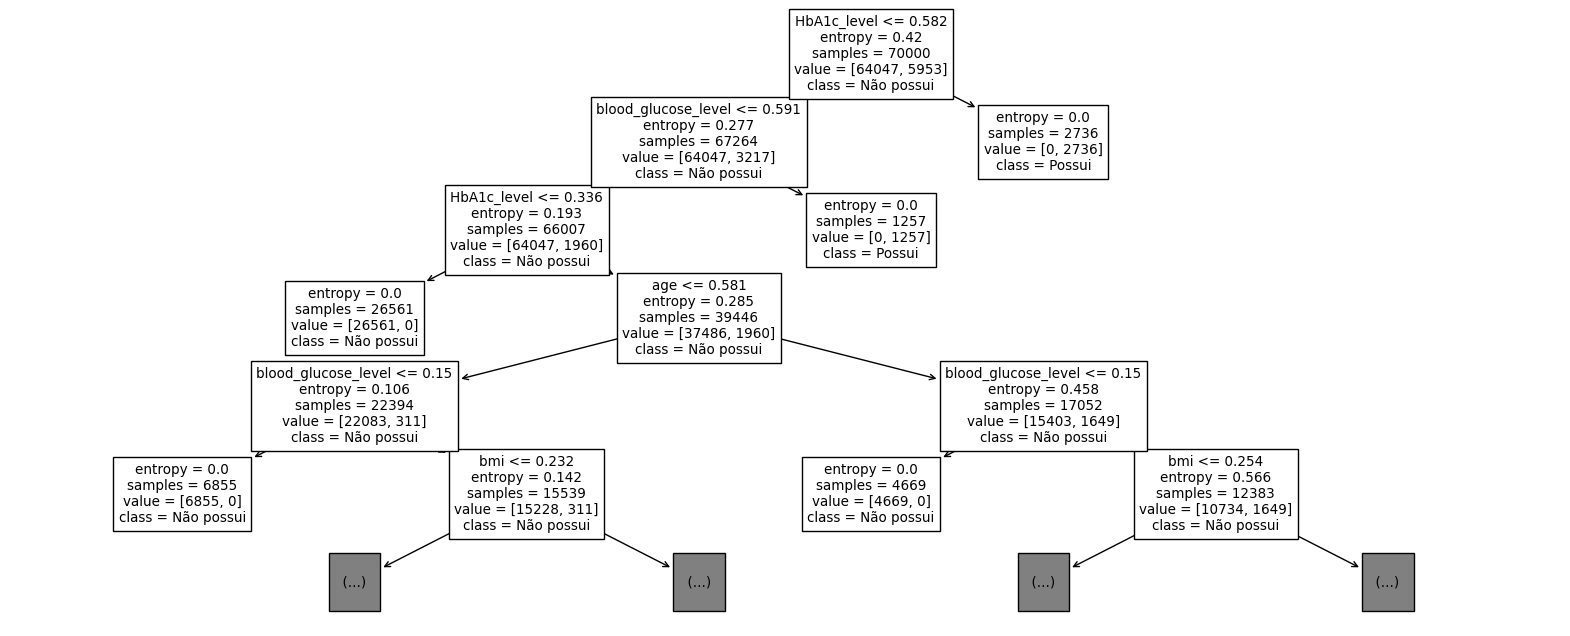

In [88]:
#Plot da árvore de decisão

fig = plt.figure(figsize=(20,8))

tree.plot_tree(clf, feature_names = dados.columns.drop('diabetes'),  
                    class_names = ['Não possui', 'Possui'],
                    max_depth = 5,
                    filled = False)

# tree.plot_tree(clf)

plt.show()

#### - Acurácia (2)

In [89]:
accuracy_score(y_test2, y_pred2)

0.9539333333333333

#### Matriz de Confusão (2)

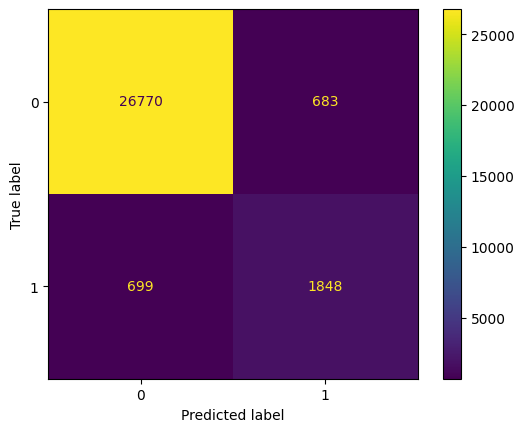

In [90]:
cm = confusion_matrix(y_test2, y_pred2)
ConfusionMatrixDisplay(cm).plot()

### - **Árvore de decisão com Validação Cruzada (3)**
###### - Acurácia: 0.9537333333333333

In [91]:
X3 = dados.drop(['diabetes'], axis=1).values
y3 = dados['diabetes'].values

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, train_size=0.7, test_size=0.3, random_state=42)

In [92]:
clf = DecisionTreeClassifier(criterion="entropy")

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=10)
lst_accu_stratified = []

for train_index, test_index in skf.split(X_train3, y_train3):
    x_train_fold, x_test_fold = X3[train_index], X3[test_index]
    y_train_fold, y_test_fold = y3[train_index], y3[test_index]
    clf.fit(X_train3, y_train3)
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold))
  
# Print the output.
print('Lista de ACC:', lst_accu_stratified)
print('\nMaior ACC:',
      max(lst_accu_stratified)*100, '%')
print('\nMenor ACC:',
      min(lst_accu_stratified)*100, '%')
print('\nMédia ACC:',
      sts.mean(lst_accu_stratified)*100, '%')
print('\nDesvio Padrão:', sts.stdev(lst_accu_stratified))

Lista de ACC: [0.9874285714285714, 0.9862857142857143, 0.9861428571428571, 0.986, 0.9852857142857143, 0.9875714285714285, 0.9868571428571429, 0.9844285714285714, 0.984, 0.9891428571428571]

Maior ACC: 98.91428571428571 %

Menor ACC: 98.4 %

Média ACC: 98.63142857142857 %

Desvio Padrão: 0.001535372793334714


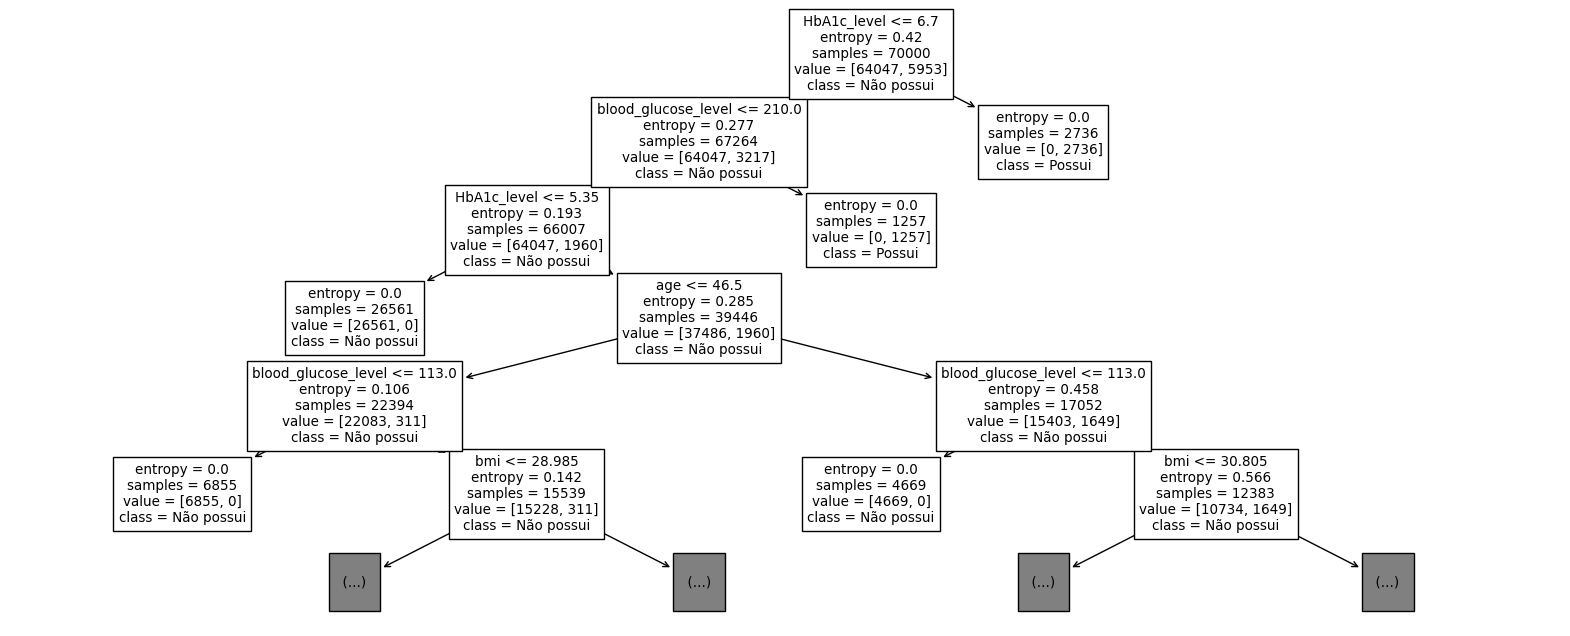

In [93]:
#arvore de decisao
fig = plt.figure(figsize=(20,8))

tree.plot_tree(clf, 
                   feature_names=dados.columns.drop('diabetes'),  
                   class_names=['Não possui', 'Possui'],
                   max_depth = 5,
                   filled=False)

plt.show()

In [94]:
accuracy_score(y_test3,y_pred3)

0.9537333333333333

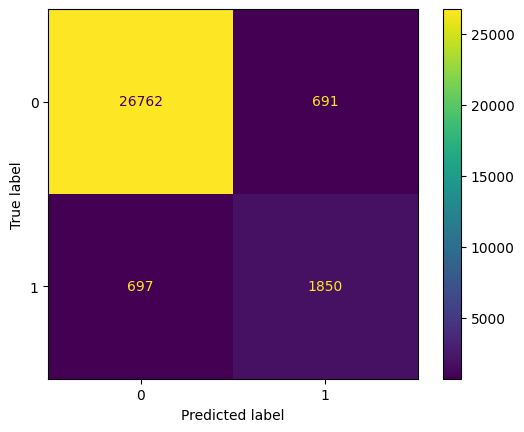

In [95]:
cm = confusion_matrix(y_test3, y_pred3)
ConfusionMatrixDisplay(cm).plot()

### - **Árvore de decisão normalizado (Standard) com Validação Cruzada (4)**
###### - Acurácia: 0.9540333333333333

In [96]:
X4 = dados.drop(['diabetes'], axis=1).values
y4 = dados['diabetes'].values

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, train_size=0.7, test_size=0.3, random_state=42)

In [97]:
scalerS = StandardScaler()

In [98]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=10)
lst_accu_stratified = []

for train_index, test_index in skf.split(X_train4, y_train4):
    x_train_fold, x_test_fold = X4[train_index], X4[test_index]
    y_train_fold, y_test_fold = y4[train_index], y4[test_index]
    scalerS.fit(X_train4, y_train4)
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold))
  
# Print the output.
print('Lista de ACC:', lst_accu_stratified)
print('\nMaior ACC:',
      max(lst_accu_stratified)*100, '%')
print('\nMenor ACC:',
      min(lst_accu_stratified)*100, '%')
print('\nMédia ACC:',
      sts.mean(lst_accu_stratified)*100, '%')
print('\nDesvio Padrão:', sts.stdev(lst_accu_stratified))


Lista de ACC: [0.9861428571428571, 0.987, 0.9854285714285714, 0.9857142857142858, 0.9852857142857143, 0.9871428571428571, 0.9871428571428571, 0.9844285714285714, 0.9847142857142858, 0.9891428571428571]

Maior ACC: 98.91428571428571 %

Menor ACC: 98.44285714285715 %

Média ACC: 98.62142857142857 %

Desvio Padrão: 0.0014178166600913448


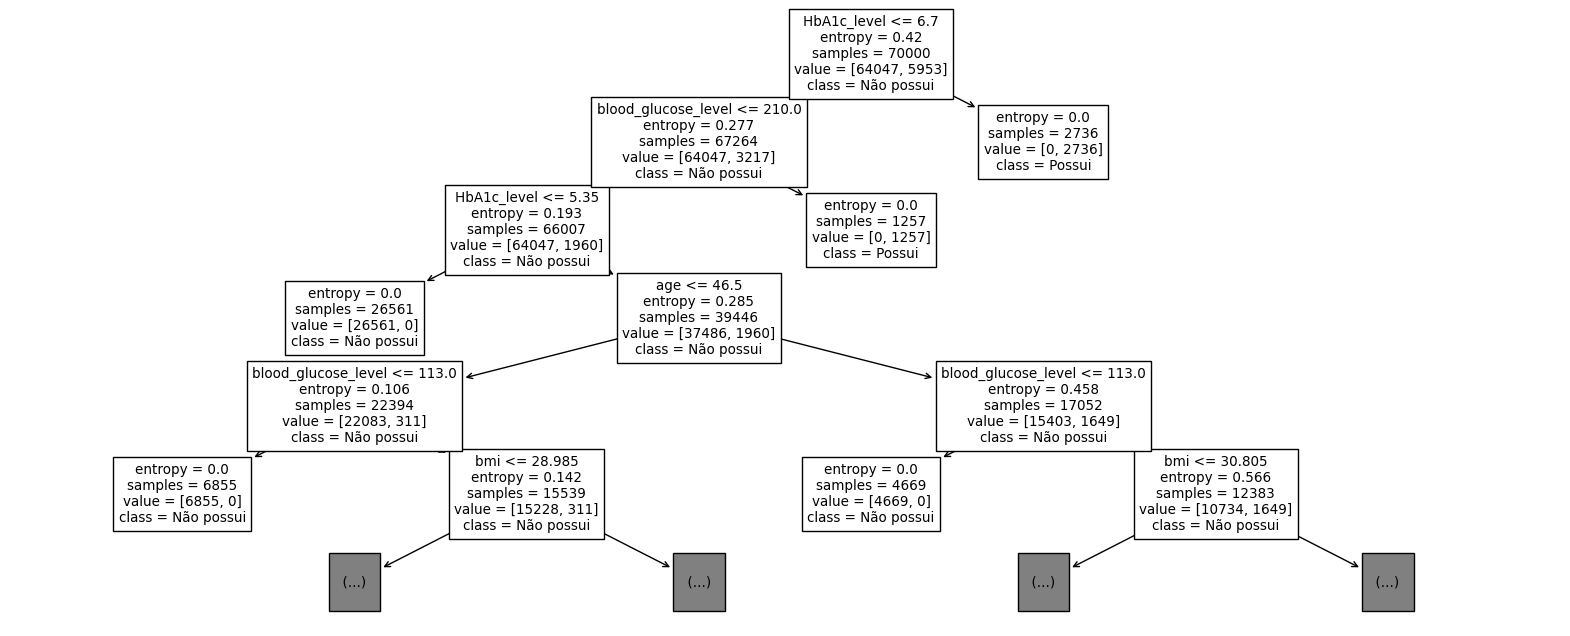

In [99]:
fig = plt.figure(figsize=(20,8))

tree.plot_tree(clf, 
                   feature_names=dados.columns.drop('diabetes'),  
                   class_names=['Não possui', 'Possui'],
                   max_depth = 5,
                   filled=False)

plt.show() 

In [100]:
y_pred4 = clf.predict(X_test4)
accuracy_score(y_test4,y_pred4)

0.9546333333333333

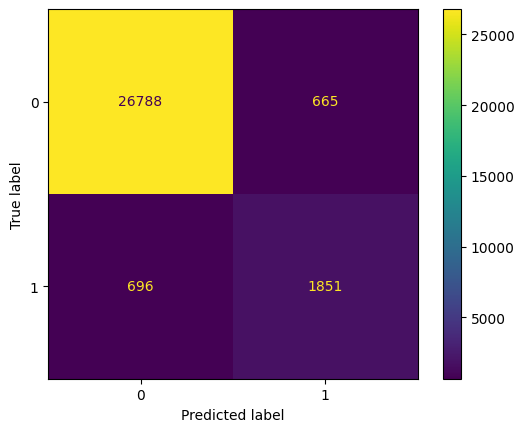

In [101]:
cm = confusion_matrix(y_test4, y_pred4)
ConfusionMatrixDisplay(cm).plot()

### - **Árvore de decisão com normalização (MinMax) com Validação Cruzada (5)**
###### - Acurácia: 0.9540333333333333

In [102]:
X5 = dados.drop(['diabetes'], axis=1).values
y5 = dados['diabetes'].values

X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, train_size=0.7, test_size=0.3, random_state=42)

In [103]:
scalerM = MinMaxScaler()

In [104]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=10)
lst_accu_stratified = []

for train_index, test_index in skf.split(X_train5, y_train5):
    x_train_fold, x_test_fold = X5[train_index], X5[test_index]
    y_train_fold, y_test_fold = y5[train_index], y5[test_index]
    scalerM.fit(X_train5, y_train5)
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold))
  
# Print the output.
print('Lista de ACC:', lst_accu_stratified)
print('\nMaior ACC:',
      max(lst_accu_stratified)*100, '%')
print('\nMenor ACC:',
      min(lst_accu_stratified)*100, '%')
print('\nMédia ACC:',
      sts.mean(lst_accu_stratified)*100, '%')
print('\nDesvio Padrão:', sts.stdev(lst_accu_stratified))

Lista de ACC: [0.9861428571428571, 0.987, 0.9854285714285714, 0.9857142857142858, 0.9852857142857143, 0.9871428571428571, 0.9871428571428571, 0.9844285714285714, 0.9847142857142858, 0.9891428571428571]

Maior ACC: 98.91428571428571 %

Menor ACC: 98.44285714285715 %

Média ACC: 98.62142857142857 %

Desvio Padrão: 0.0014178166600913448


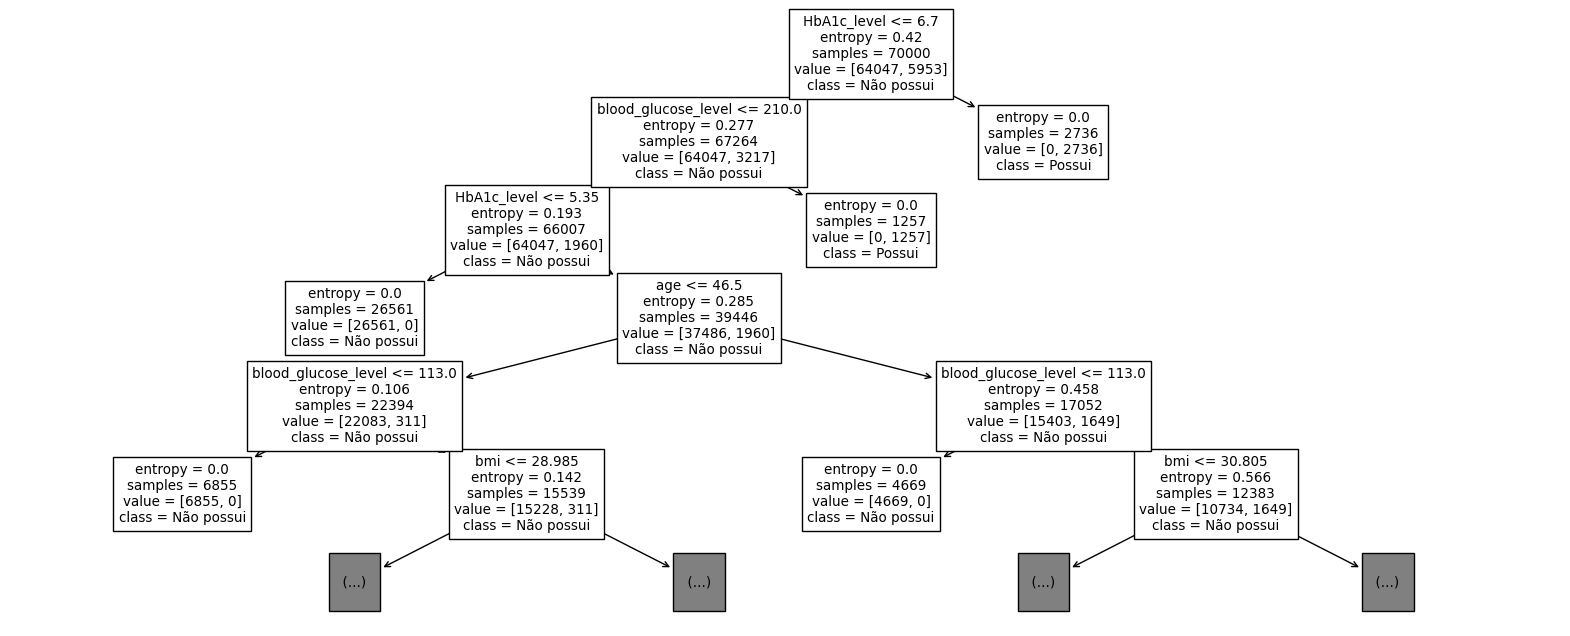

In [105]:
fig = plt.figure(figsize=(20,8))

tree.plot_tree(clf, 
                   feature_names=dados.columns.drop('diabetes'),  
                   class_names=['Não possui', 'Possui'],
                   max_depth = 5,
                   filled=False)

plt.show() 

In [106]:
y_pred5 = clf.predict(X_test5)
accuracy_score(y_test5,y_pred5)

0.9546333333333333

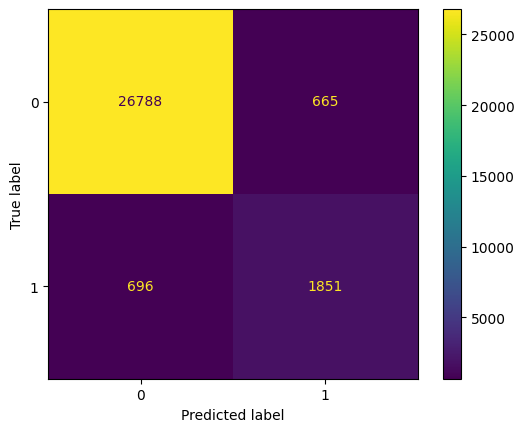

In [107]:
cm = confusion_matrix(y_test5, y_pred5)
ConfusionMatrixDisplay(cm).plot()

### **Algoritmo KNN (6)**
###### - Acurácia: 0.9522333333333334

In [108]:
## Sem normalização
X6 = dados.drop(['diabetes'], axis=1).values
y6 = dados['diabetes'].values

X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, train_size=0.7, test_size=0.3, random_state=42)

In [109]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train6, y_train6)
y_pred6 = knn.predict(X_test6)
accuracy_score(y_test6, y_pred6)

0.9522333333333334

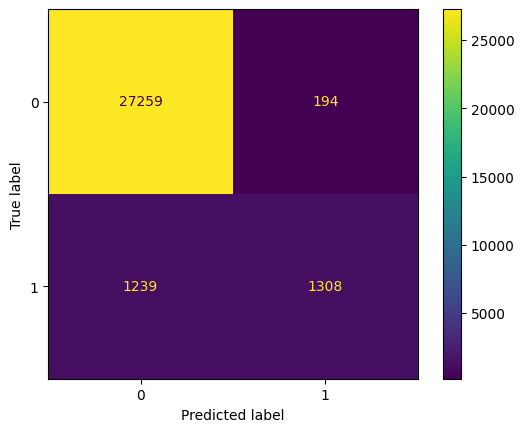

In [110]:
cm = confusion_matrix(y_test6, y_pred6)
ConfusionMatrixDisplay(cm).plot()

### **Algoritmo KNN + Validação Cruzada (7)**
###### - Acurácia: 0.9580333333333333


In [111]:
## Sem normalização
X7 = dados.drop(['diabetes'], axis=1).values
y7 = dados['diabetes'].values

X_train7, X_test7, y_train7, y_test7 = train_test_split(X7, y7, train_size=0.7, test_size=0.3, random_state=42)

In [112]:
knn = KNeighborsClassifier(n_neighbors=5)

In [113]:
# Criação do objeto de validação cruzada
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(X_train7, y_train7):
    x_train_fold, x_test_fold = X7[train_index], X7[test_index]
    y_train_fold, y_test_fold = y7[train_index], y7[test_index]
    knn.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(knn.score(x_test_fold, y_test_fold))
  
# Print the output.
print('Lista de ACC:', lst_accu_stratified)
print('\nMaior ACC:',
      max(lst_accu_stratified)*100,'%')
print('\nMenor ACC:',
      min(lst_accu_stratified)*100,'%')
print('\nMédia ACC:',
      sts.mean(lst_accu_stratified)*100,'%')
print('\nDesvio Padrão:', sts.stdev(lst_accu_stratified))

Lista de ACC: [0.9512857142857143, 0.9508571428571428, 0.9541428571428572, 0.9437142857142857, 0.9524285714285714, 0.9551428571428572, 0.952, 0.954, 0.9521428571428572, 0.9502857142857143]

Maior ACC: 95.51428571428572 %

Menor ACC: 94.37142857142857 %

Média ACC: 95.16 %

Desvio Padrão: 0.0031707277933037755


In [114]:
y_pred7 = knn.predict(X_test7)

In [115]:
accuracy_score(y_test7, y_pred7)

0.9580333333333333

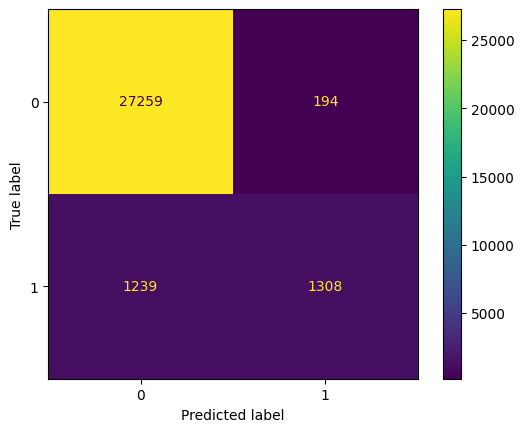

In [116]:
cm = confusion_matrix(y_test6, y_pred6)
ConfusionMatrixDisplay(cm).plot()

### **Algoritmo Randon Forest (8)**
###### - Acurácia: 0.9580333333333333


In [117]:
## Sem normalização
X8 = dados.drop(['diabetes'], axis=1).values
y8 = dados['diabetes'].values

X_train8, X_test8, y_train8, y_test8 = train_test_split(X8, y8, train_size=0.7, test_size=0.3, random_state=42)

In [118]:
forest = RandomForestClassifier(n_estimators = 50, random_state=10)
forest.fit(X_train8, y_train8)
y_pred8 = forest.predict(X_test8)
accuracy_score(y_test8, y_pred8)

0.9704

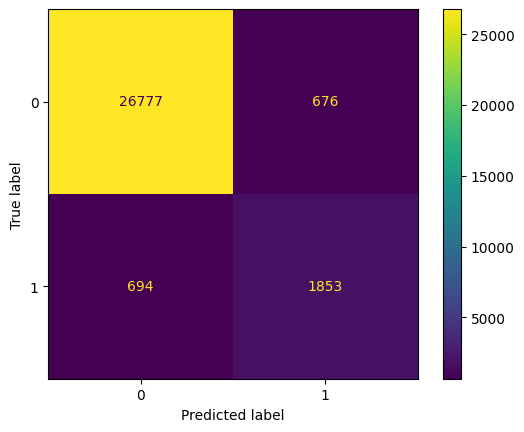

In [119]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

### **Algoritmo Randon Forest + Validação Cruzada (9)**
###### - Acurácia: 0.988

In [120]:
## Sem normalização
X9 = dados.drop(['diabetes'], axis=1).values
y9 = dados['diabetes'].values

X_train9, X_test9, y_train9, y_test9 = train_test_split(X9, y9, train_size=0.7, test_size=0.3, random_state=42)

In [121]:
forest = RandomForestClassifier(n_estimators = 50, random_state=10)

In [122]:
# Criação do objeto de validação cruzada
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(X_train9, y_train9):
    x_train_fold, x_test_fold = X9[train_index], X9[test_index]
    y_train_fold, y_test_fold = y9[train_index], y9[test_index]
    forest.fit(x_train_fold, y_train_fold)    
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold))
  
# Print the output.
print('Lista de ACC:', lst_accu_stratified)
print('\nMaior ACC:',
      max(lst_accu_stratified)*100, '%')
print('\nMenor ACC:',
      min(lst_accu_stratified)*100, '%')
print('\nMédia ACC:',
      sts.mean(lst_accu_stratified)*100, '%')
print('\nDesvio Padrão:', sts.stdev(lst_accu_stratified))

Lista de ACC: [0.9872857142857143, 0.9881428571428571, 0.9858571428571429, 0.9854285714285714, 0.9867142857142858, 0.986, 0.9847142857142858, 0.9872857142857143, 0.9845714285714285, 0.9861428571428571]

Maior ACC: 98.81428571428572 %

Menor ACC: 98.45714285714286 %

Média ACC: 98.62142857142857 %

Desvio Padrão: 0.0011551913781626853


In [123]:
y_pred9 = forest.predict(X_test9)
accuracy_score(y_test9, y_pred9)

0.988

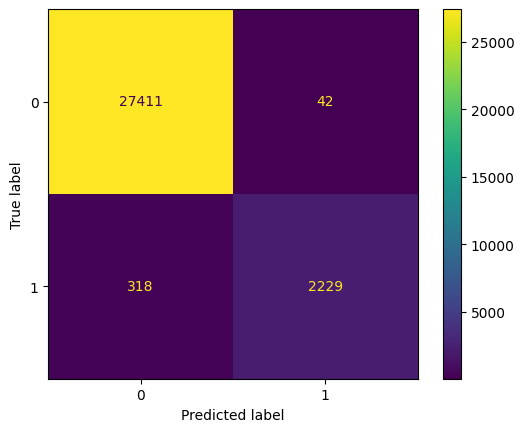

In [124]:
cm = confusion_matrix(y_test9, y_pred9)
ConfusionMatrixDisplay(cm).plot()